# **ERP and time-frequency analysis in Python and MNE**

### **Working with trial-based data in Python**

In [1]:
#Imporging necessary libraries
from scipy.io import loadmat
#Loading MATLAB data
data = loadmat('Trial-based.mat')
type(data)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 23 12:56:11 2012',
 '__version__': '1.0',
 '__globals__': [],
 'EEGa': array([[-0.18590963,  0.44987601,  1.06070801, ..., -0.79770987,
         -1.27420635,  0.86740939],
        [-1.27296531, -0.04482613,  1.17094627, ..., -0.27280661,
         -0.07113736,  1.81706292],
        [-0.51537389,  0.22758911,  0.1262017 , ...,  0.1015288 ,
         -1.21639478,  0.17507807],
        ...,
        [-0.36473052,  0.75917791, -0.04315389, ...,  1.82811111,
         -0.67667997, -0.70685567],
        [-2.42409707, -0.09510218,  0.77628421, ..., -0.58166411,
         -0.85891286, -1.24739797],
        [ 0.22897273,  0.4151541 , -0.20119966, ..., -0.87061468,
          0.95545503, -1.65280992]]),
 'EEGb': array([[ 0.34505897, -1.38429155,  0.67707384, ..., -0.82542478,
          3.55902151,  1.1320362 ],
        [ 2.87668092,  3.0590817 , -0.27684618, ..., -0.08762969,
         -1.88665721,  0.36815195],
        [-2.762

In [4]:
### Mote: Sampling frequency = 500 Hz

In [3]:
#View the data associated with keys
for key in data.keys():
    print(key, data[key])


__header__ b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 23 12:56:11 2012'
__version__ 1.0
__globals__ []
EEGa [[-0.18590963  0.44987601  1.06070801 ... -0.79770987 -1.27420635
   0.86740939]
 [-1.27296531 -0.04482613  1.17094627 ... -0.27280661 -0.07113736
   1.81706292]
 [-0.51537389  0.22758911  0.1262017  ...  0.1015288  -1.21639478
   0.17507807]
 ...
 [-0.36473052  0.75917791 -0.04315389 ...  1.82811111 -0.67667997
  -0.70685567]
 [-2.42409707 -0.09510218  0.77628421 ... -0.58166411 -0.85891286
  -1.24739797]
 [ 0.22897273  0.4151541  -0.20119966 ... -0.87061468  0.95545503
  -1.65280992]]
EEGb [[ 0.34505897 -1.38429155  0.67707384 ... -0.82542478  3.55902151
   1.1320362 ]
 [ 2.87668092  3.0590817  -0.27684618 ... -0.08762969 -1.88665721
   0.36815195]
 [-2.76200453  0.7735988  -0.24098119 ... -0.89488171  2.54410172
  -1.63708799]
 ...
 [-1.68974195  1.28709343  0.58593501 ...  0.01487124  2.87129371
   1.29376482]
 [-2.95198188  0.1410741  -2.03974454 ... -1.093

In [10]:
#Exctract conditions of the experiment
conditionHappyFace = data['EEGa']
conditionNonFace = data['EEGb']

#Extract time
time = data['t'][0]
#time.shape
%whos


Variable             Type        Data/Info
------------------------------------------
conditionHappyFace   ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
conditionNonFace     ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
data                 dict        n=6
key                  str         t
loadmat              function    <function loadmat at 0x0000026C3EF4BBA0>
time                 ndarray     500: 500 elems, type `float64`, 4000 bytes


In [11]:
#Define number of trials
trialNumber = conditionHappyFace.shape[0]

#Define number of samples in each trial
sampleNumber = conditionHappyFace.shape[1]


In [12]:
conditionHappyFace.shape[0]

1000

In [17]:
#Print first/last trial
print(conditionHappyFace[0]) # first trial
print(conditionHappyFace[999]) # last trial 
# range lies between 0 to 999

[-1.85909632e-01  4.49876010e-01  1.06070801e+00 -4.71265246e-01
  1.68669327e+00  9.38221338e-01  2.21207038e-01  4.05491276e-01
  8.78879665e-01  5.23697825e-01 -2.35240678e+00 -9.24345879e-01
  7.66671797e-01 -4.64254999e-01  6.25953180e-02  1.51917029e+00
 -7.76400815e-01  8.14988739e-01 -1.58137285e-01 -6.17402518e-01
  2.07506393e-01  3.59430871e-01 -1.21455008e+00 -6.16715452e-01
 -4.81362032e-02  3.17982689e-01 -2.77459585e-01  4.14839815e-02
 -1.52257779e+00  1.31993666e+00  1.46836023e+00  1.84666100e+00
  5.23163980e-02  2.05515379e-01  2.27994679e-01 -1.34063464e+00
  5.61451651e-01  1.20391968e+00  1.06398658e+00  4.38748238e-01
  1.64443736e+00 -1.54713823e+00  6.41177787e-01 -1.13319311e+00
  1.06869889e+00  3.88678297e-01 -1.86251056e+00 -1.14074604e+00
 -4.59323117e-01  7.46220184e-01  4.40752835e-01 -7.05129357e-01
 -1.85879610e-01 -4.52021194e-02 -7.74389189e-01  1.55051475e+00
  1.12600755e+00 -1.14703552e+00 -5.42577409e-02  8.27809465e-01
  8.56502531e-01 -1.14366

### **Plotting single trials**

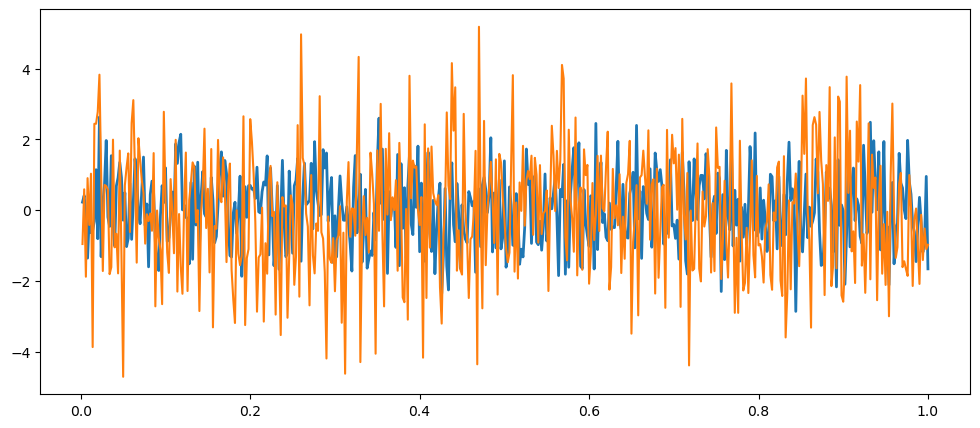

In [28]:
#Ploting one trial for each condition of the experiment
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(time, conditionHappyFace[999], linewidth=2)
plt.plot(time, conditionNonFace[999])



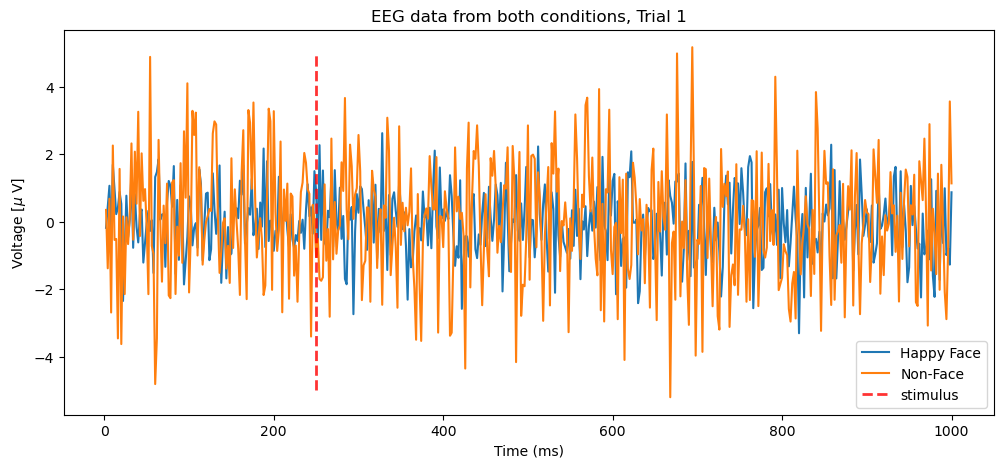

In [24]:
plt.figure(figsize=(12,5))
plt.plot(time*1000, conditionHappyFace[0], label='Happy Face')
plt.plot(time*1000, conditionNonFace[0], label='Non-Face')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage [$\mu$ V]')
plt.title('EEG data from both conditions, Trial 1')

plt.plot([250,250],[-5,5], 'r', lw=2, label='stimulus', alpha=.8, ls='--')

plt.legend()



### **Computing ERP for the conditions**

In [25]:
#Compute mean ERPs over the first (raw) dimention
ERPHappy = conditionHappyFace.mean(0)
ERPNonFace = conditionNonFace.mean(0)

### **Plotting mean ERPs**

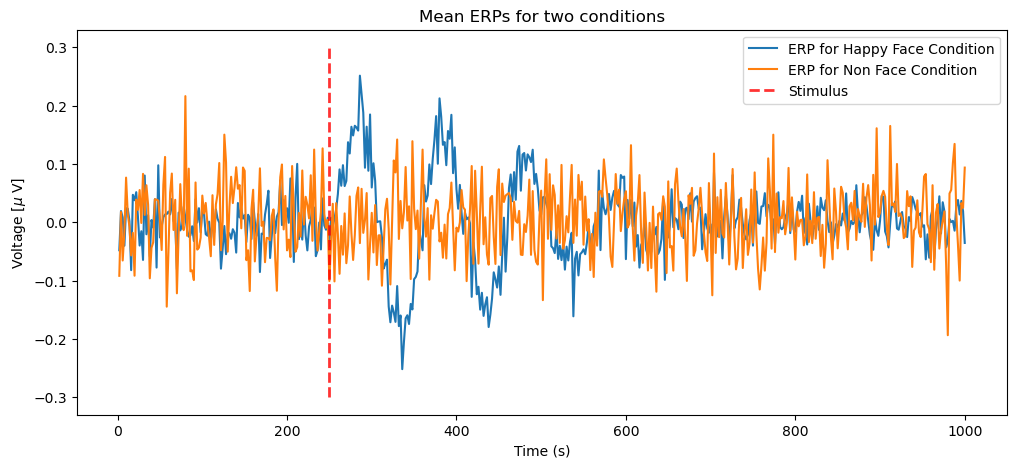

In [27]:
plt.figure(figsize=(12,5))

plt.plot(time*1000, ERPHappy, label='ERP for Happy Face Condition')
plt.plot(time*1000, ERPNonFace, label='ERP for Non Face Condition')
plt.xlabel('Time (s)')
plt.ylabel('Voltage [$\mu$ V]')
plt.title('Mean ERPs for two conditions')

plt.plot([250, 250], [-.3,.3], 'r', lw=2, label='Stimulus', alpha=0.8, ls='--')
plt.legend()


### **ERP analysis in MNE**

### **Importing EEG in MNE**

In [29]:
#importing necessary libraries
import mne
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

#Importing EDF file
EEG = mne.io.read_raw_edf('ERD_ERS.edf', preload=True)


Extracting EDF parameters from E:\courses\Udemy_courses\EEG signal processing\ERD_ERS.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_20056\447705777.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  EEG = mne.io.read_raw_edf('ERD_ERS.edf', preload=True)
C:\Users\SUBHAM\AppData\Local\Temp\ipykernel_20056\447705777.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  EEG = mne.io.read_raw_edf('ERD_ERS.edf', preload=True)


Reading 0 ... 378499  =      0.000 ...   756.998 secs...


In [30]:
#Examine the EEG channels
EEG.ch_names

['Fp1-Av',
 'Fp2-Av',
 'F7-Av',
 'F3-Av',
 'Fz-Av',
 'F4-Av',
 'F8-Av',
 'T3-Av',
 'C3-Av',
 'Cz-Av',
 'C4-Av',
 'T4-Av',
 'T5-Av',
 'P3-Av',
 'Pz-Av',
 'P4-Av',
 'T6-Av',
 'O1-Av',
 'O2-Av',
 'LABEL']

In [31]:
#Remove desired channel
EEG.drop_channels('LABEL')

Measurement date,"February 27, 2020 15:24:36 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.53 Hz
Lowpass,30.00 Hz


In [32]:
EEG.ch_names

['Fp1-Av',
 'Fp2-Av',
 'F7-Av',
 'F3-Av',
 'Fz-Av',
 'F4-Av',
 'F8-Av',
 'T3-Av',
 'C3-Av',
 'Cz-Av',
 'C4-Av',
 'T4-Av',
 'T5-Av',
 'P3-Av',
 'Pz-Av',
 'P4-Av',
 'T6-Av',
 'O1-Av',
 'O2-Av']

### **Montage set**

In [33]:
montage = mne.channels.make_standard_montage('standard_1020')
EEG.set_montage(montage, on_missing='ignore')


Measurement date,"February 27, 2020 15:24:36 GMT"
Experimenter,Unknown
Participant,X
Digitized points,3 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.53 Hz
Lowpass,30.00 Hz


In [34]:
#Filter the data
EEG.filter(0.1, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


Measurement date,"February 27, 2020 15:24:36 GMT"
Experimenter,Unknown
Participant,X
Digitized points,3 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.53 Hz
Lowpass,30.00 Hz


Using matplotlib as 2D backend.


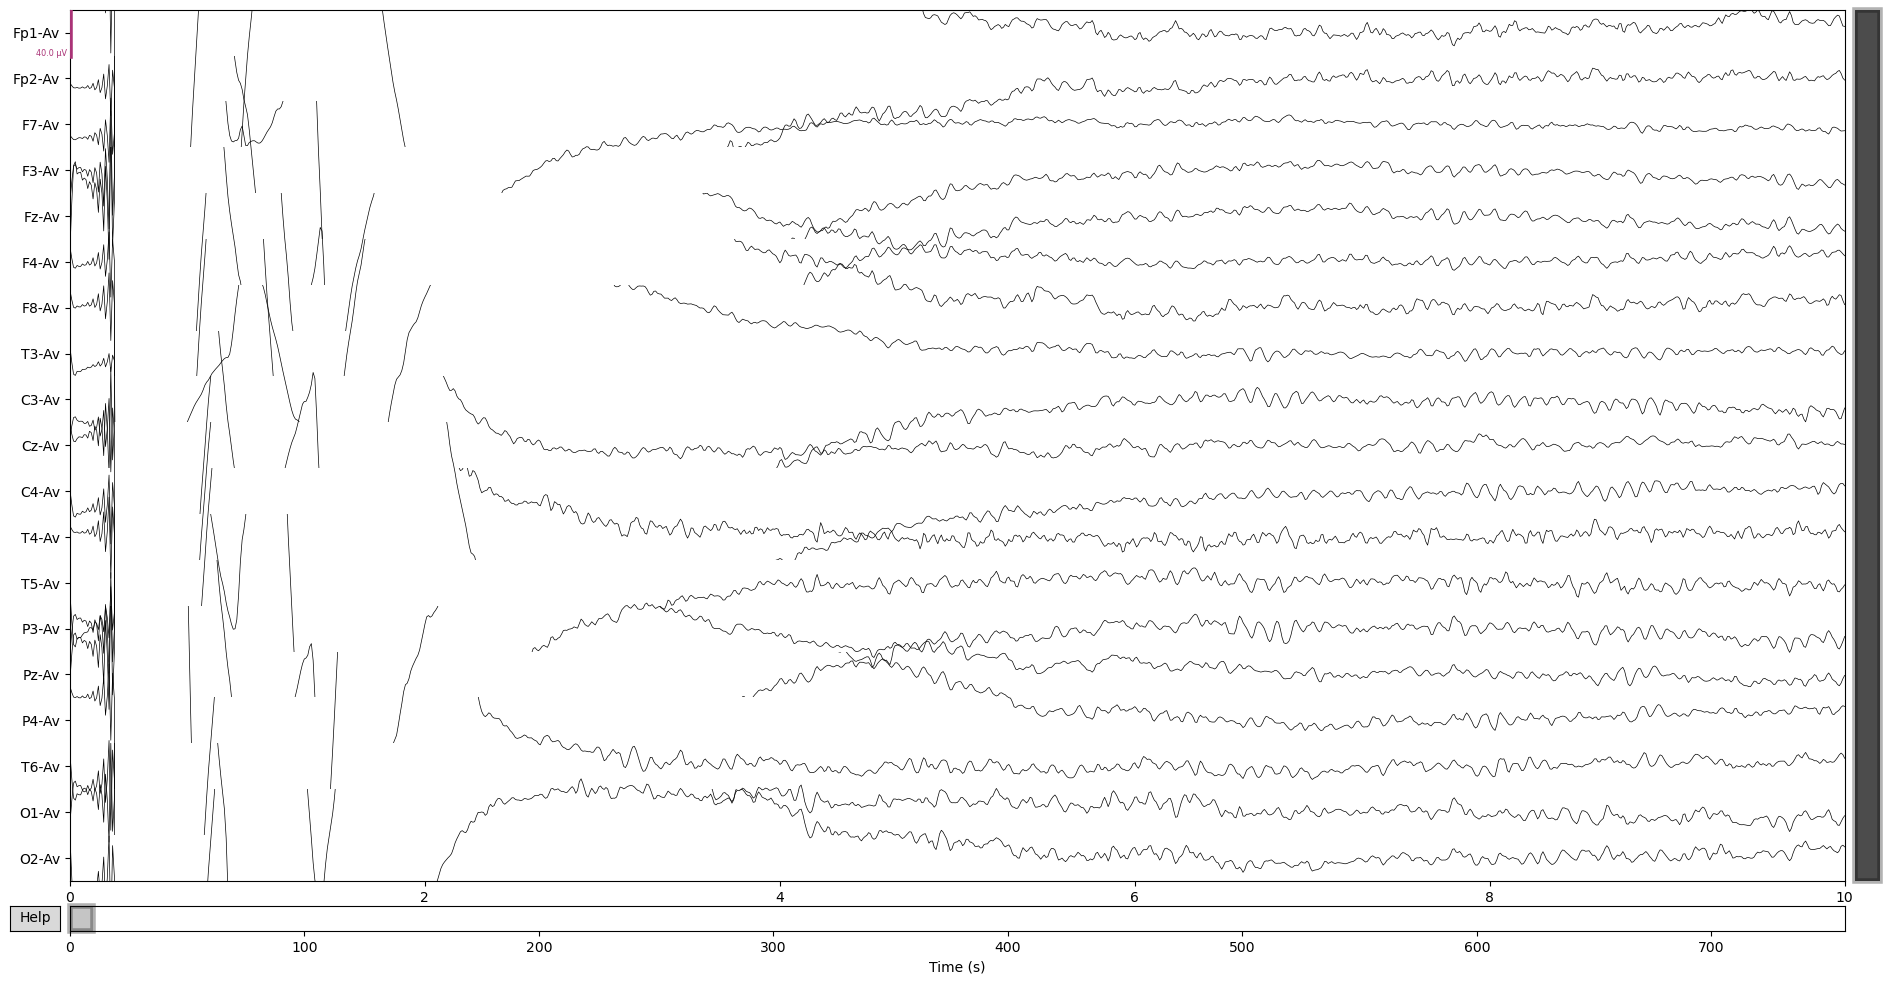

In [35]:
EEG.plot(block=False, duration=10.0)

### **Loading the Labels file and creating Events**

In [38]:
# Loading trigger codes from Labels.txt
labelsData = np.loadtxt('Labels.txt', dtype=float)
triggerCodes = labelsData[:, 0]
# Extracting sampling frequency from EEG info
sfreq = EEG.info['sfreq']

# Converting trigger codes to trigger samples
triggerSamples = (triggerCodes * sfreq ).astype(int)

# Extracting condition labels
conditionLabels = (labelsData[:,1]).astype(int)

# Creating EEG events array with trigger samples and condition labels
EEGEvents = np.column_stack((triggerSamples, np.zeros_like(triggerSamples), conditionLabels))
conditionLabels

array([1, 2, 2, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 4, 3, 1, 3, 2, 1, 2, 1,
       1, 1, 3, 4, 3, 4, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 3, 1, 3, 1, 4, 2,
       1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2,
       2, 2, 3, 2, 1, 1, 4, 2, 2, 2, 1, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 1,
       1, 2, 2, 4, 2, 3, 2, 1, 2, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 1, 1, 2,
       2, 4, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 3, 1, 3, 1, 2,
       2, 1, 2, 2, 2, 3, 1, 1, 4, 2, 3, 1, 1, 3, 3, 2, 1, 3, 2, 1, 2, 2,
       1, 2, 2, 2, 4, 3, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3, 1, 1, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3,
       3, 2, 2, 3])

In [39]:
triggerCodes

array([ 20.002,  23.51 ,  27.144,  30.78 ,  34.388,  37.912,  41.57 ,
        45.184,  48.78 ,  52.308,  56.02 ,  59.696,  63.218,  66.802,
        70.33 ,  74.018,  77.59 ,  81.15 ,  84.78 ,  88.334,  91.96 ,
        95.506,  99.1  , 102.71 , 106.312, 109.99 , 113.636, 117.174,
       120.866, 124.492, 128.068, 131.744, 135.448, 138.972, 142.554,
       146.258, 149.95 , 153.486, 157.072, 160.626, 164.306, 167.91 ,
       171.554, 175.118, 178.806, 182.316, 185.87 , 189.424, 193.098,
       196.608, 200.314, 203.91 , 207.444, 210.954, 214.468, 218.086,
       221.65 , 225.238, 228.784, 232.306, 235.972, 239.494, 243.106,
       246.782, 250.434, 253.988, 257.65 , 261.204, 264.852, 268.526,
       272.218, 275.866, 279.436, 283.008, 286.676, 290.302, 293.884,
       297.5  , 301.068, 304.606, 308.206, 311.764, 315.456, 318.966,
       322.562, 326.1  , 329.772, 333.376, 337.02 , 340.578, 344.208,
       347.822, 351.502, 355.16 , 358.77 , 362.34 , 366.034, 369.72 ,
       373.348, 377.

### **Epoching the events for MNE**

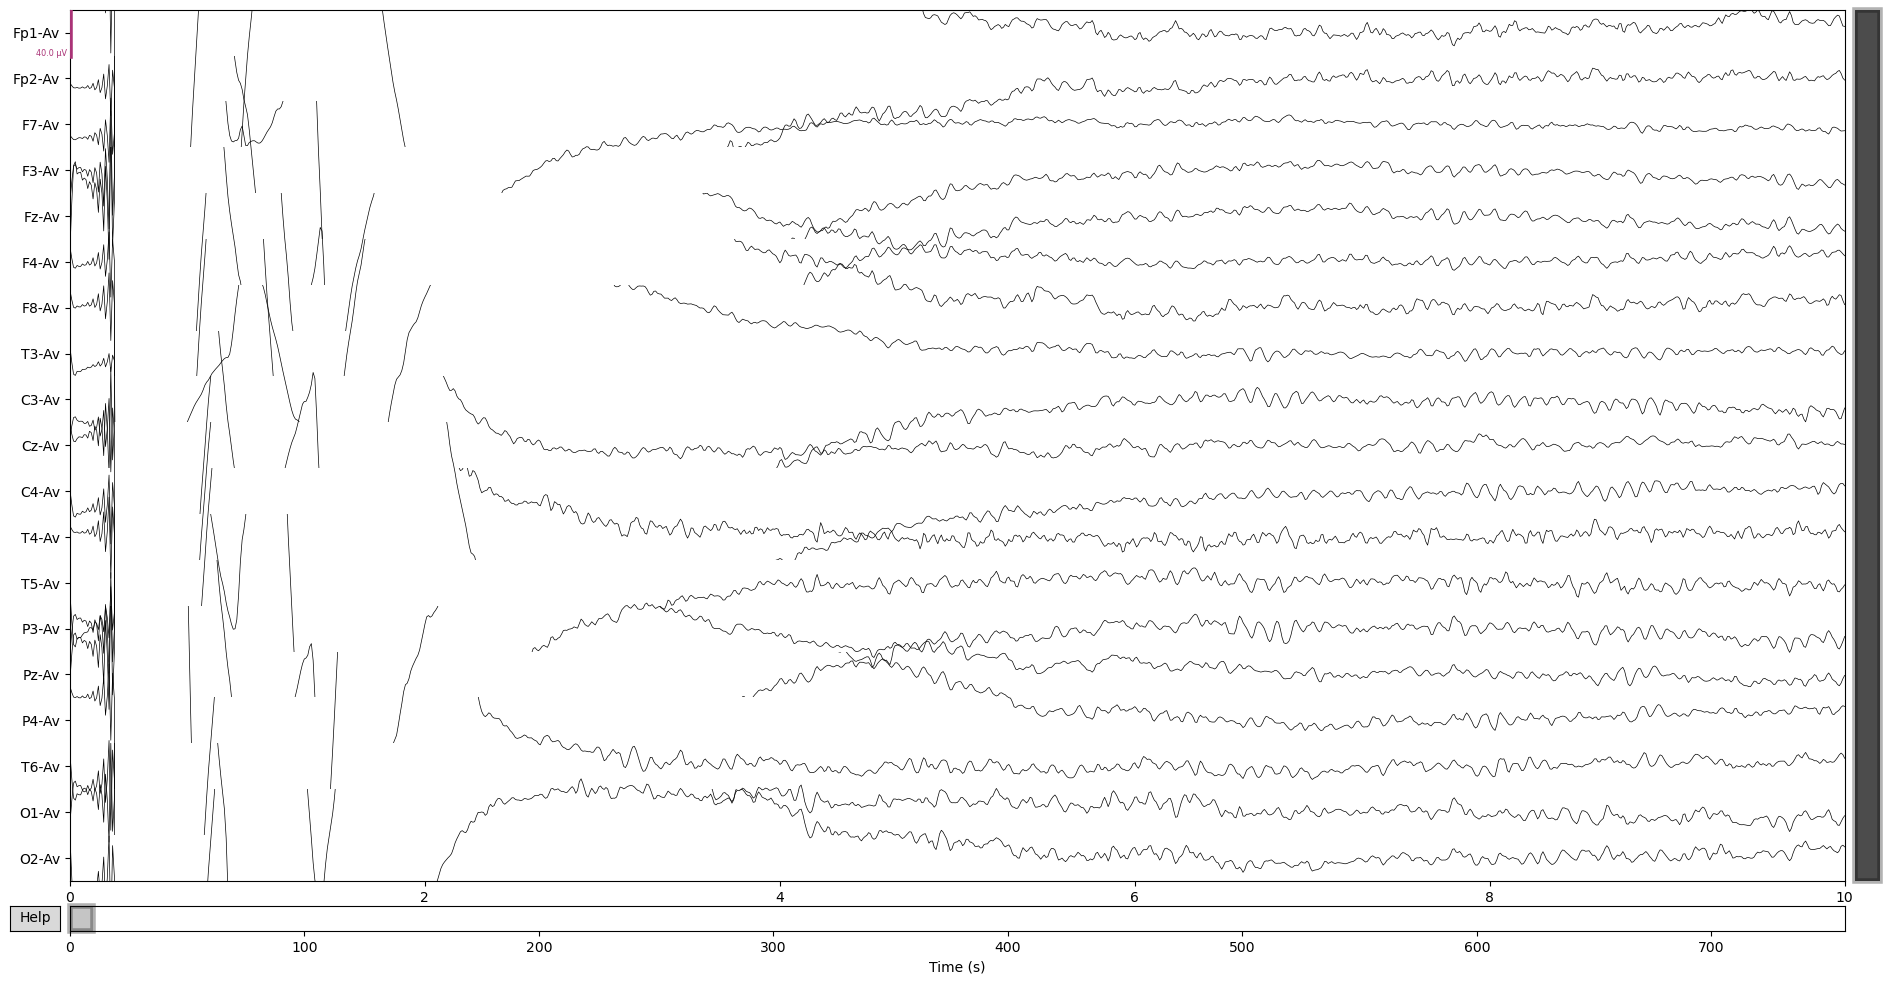

Channels marked as bad:
none


In [40]:
#Plotting and seeeing events
EEG.plot(block=False, duration=10.0, events = EEGEvents, title = 'EEG with Events')

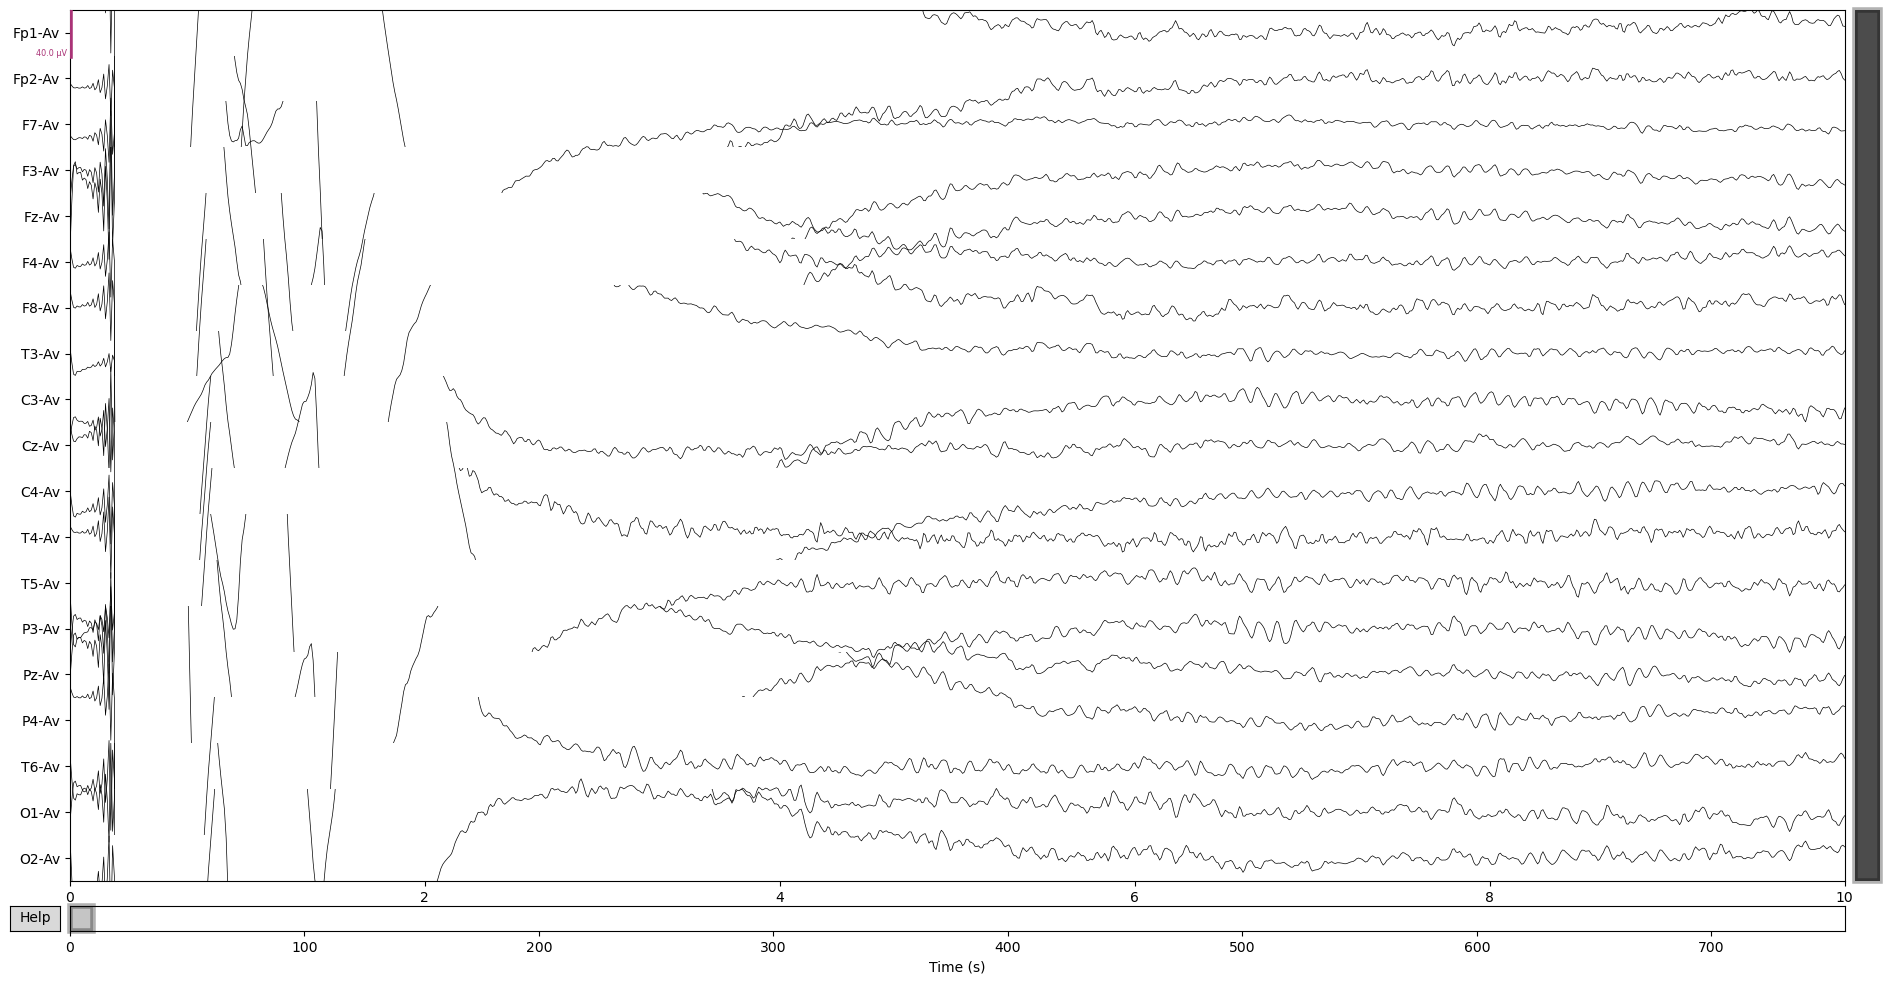

Channels marked as bad:
none


In [41]:
#Adding preferred labels for the events
eventIDs = {'Condition 1':1, 'Condition 2':2, 'Condition 3':3, 'Condition 4':4 }

EEG.plot(duration=10.0, events = EEGEvents, title='EEG with Events', event_id = eventIDs)

In [42]:
#Creating a variable for EVENTS structure
epochStart= -.2
epochEnd=2
conditionEpochs = mne.Epochs (EEG, events= EEGEvents, event_id=eventIDs, tmin=epochStart, tmax=epochEnd,
            baseline=(-0.2, 0), reject=None)
conditionEpochs

Not setting metadata
202 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,202
Events,Condition 1: 75Condition 2: 78Condition 3: 39Condition 4: 10
Time range,-0.200 – 2.000 s
Baseline,-0.200 – 0.000 s


In [43]:
#Access specific epochs
conditionEpochs['Condition 1']

Number of events,75
Events,Condition 1: 75
Time range,-0.200 – 2.000 s
Baseline,-0.200 – 0.000 s


### **Move epochs to different variables**

In [45]:
Condition1Epochs = conditionEpochs['Condition 1']
Condition2Epochs = conditionEpochs['Condition 2']
Condition1Epochs.get_data()[0,8,:]

Using data from preloaded Raw for 75 events and 1101 original time points ...
0 bad epochs dropped


array([-7.04392839e-07,  2.62418526e-07,  1.30356727e-06, ...,
        1.57784299e-06,  1.09052698e-06,  6.33414403e-07])

### **Compute mean ERPs**

In [46]:
averageERPCondition1 = Condition1Epochs.average()
averageERPCondition2 = Condition2Epochs.average()
averageERPCondition1

Condition,Condition 1
Data kind,average
Timepoints,1101 samples
Channels,19 channels
Number of averaged epochs,75
Time range (secs),-0.2 – 2.0
Baseline (secs),-0.200 – 0.000 s


### **Pick a channel**

In [47]:
channelForAnalysis = 'Fz-Av'
myPick = EEG.info['ch_names']
myPick = EEG.info['ch_names'].index(channelForAnalysis)

In [48]:
EEG.ch_names

['Fp1-Av',
 'Fp2-Av',
 'F7-Av',
 'F3-Av',
 'Fz-Av',
 'F4-Av',
 'F8-Av',
 'T3-Av',
 'C3-Av',
 'Cz-Av',
 'C4-Av',
 'T4-Av',
 'T5-Av',
 'P3-Av',
 'Pz-Av',
 'P4-Av',
 'T6-Av',
 'O1-Av',
 'O2-Av']

### **Mean for one channel**

Need more than one channel to make topography for eeg. Disabling interactivity.


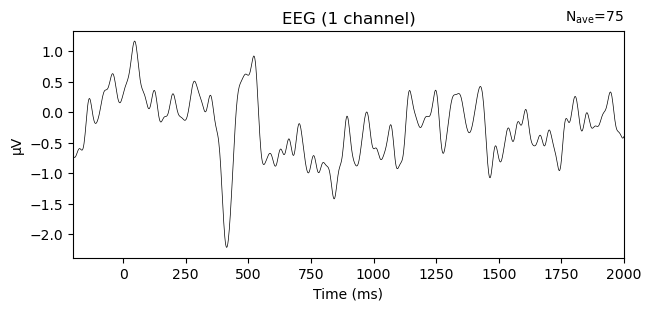

In [58]:
ERPCondition1 = Condition1Epochs.average(myPick)
ERPCondition1.plot(time_unit='ms')

Need more than one channel to make topography for eeg. Disabling interactivity.


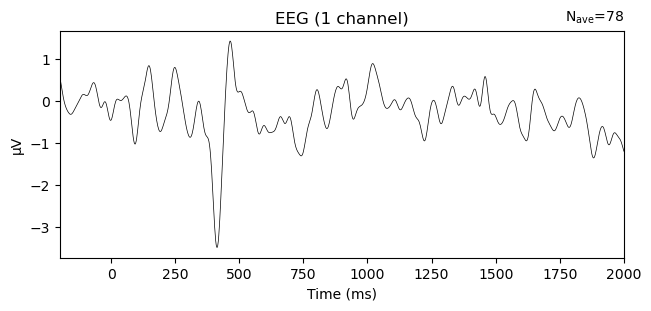

In [60]:
ERPCondition2 = Condition2Epochs.average(myPick)
ERPCondition2.plot(time_unit='ms')

In [49]:
averageERPCondition1 = Condition1Epochs.average()
averageERPCondition2 = Condition2Epochs.average()

### **Plot means for desired channels**

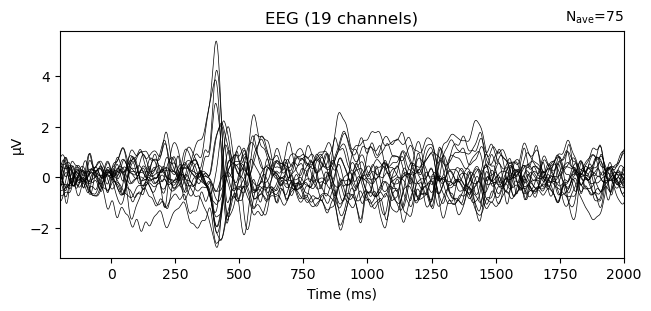

In [51]:
averageERPCondition1.plot(time_unit='ms')


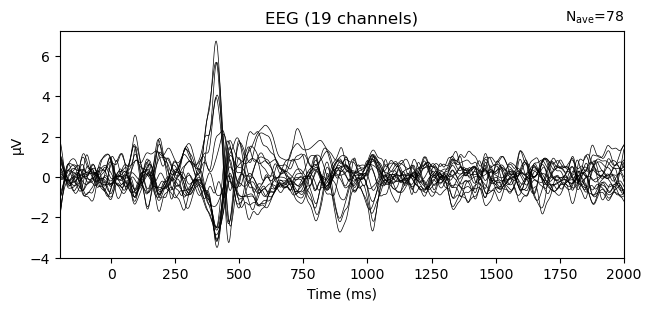

In [52]:
averageERPCondition2.plot(time_unit='ms')

### **Time-frequency in MNE**

In [53]:
from mne.time_frequency import tfr_morlet
freqRange = np.arange(4,30,.1)
numberOfCycles = 3

TFRCondition1 = tfr_morlet(Condition1Epochs, freqRange, numberOfCycles, average=True)
TFRCondition2 = tfr_morlet(Condition2Epochs, freqRange, numberOfCycles, average=True)


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
Using data from preloaded Raw for 75 events and 1101 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.2s remaining:    0.0s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
Using data from preloaded Raw for 78 events and 1101 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   51.0s finished


In [61]:
TFRCondition1

(<Average Power Estimates from Epochs (nave=75), morlet method | 19 channels × 260 freqs × 1101 times, 4.0 - 29.9 Hz, -0.20 - 2.00 s, 41.5 MB>,
 <Inter-trial coherence from Epochs (nave=75), morlet method | 19 channels × 260 freqs × 1101 times, 4.0 - 29.9 Hz, -0.20 - 2.00 s, 41.5 MB>)

### **Plotting time-frequency for our pick**

In [54]:
TFRCondition1

(<Average Power Estimates from Epochs (nave=75), morlet method | 19 channels × 260 freqs × 1101 times, 4.0 - 29.9 Hz, -0.20 - 2.00 s, 41.5 MB>,
 <Inter-trial coherence from Epochs (nave=75), morlet method | 19 channels × 260 freqs × 1101 times, 4.0 - 29.9 Hz, -0.20 - 2.00 s, 41.5 MB>)

In [70]:
TFRCondition1_Fz = TFRCondition1[0].copy()
TFRCondition1_Fz.plot(myPick, baseline=(-0.2, 0), mode='logratio',
                      title='Time-Frequency for Condition 1 (Fz)')

Applying baseline correction (mode: logratio)


[<Figure size 640x480 with 2 Axes>]

In [64]:
TFRCondition2_Fz = TFRCondition2[0].copy()
TFRCondition2_Fz.plot(myPick, baseline=(-0.2, 0), mode='logratio',
                      title='Time-Frequency for Condition 2 (Fz)')

Applying baseline correction (mode: logratio)


[<Figure size 640x480 with 2 Axes>]